In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df1 = pd.read_csv("Olympics_Cleaned.csv", encoding="ISO-8859-1")
df2=pd.read_csv("medal_winners.csv")
df3=pd.read_csv("sport_summary.csv")


In [23]:
df1.head()

,name,gender,sport,event,year,city,gold,silver,bronze
0,Dinkarrao Shinde,M,Wrestling,Featherweight,1920.0,Belgium,0.0,0.0,0.0
1,Kumar Navale,M,Wrestling,Middleweight,1920.0,Belgium,0.0,0.0,0.0
2,Shankarrao Thorat,M,Wrestling,Men's Freestyle Wrestling,1936.0,Berlin,0.0,0.0,0.0
3,Rashid Anwar,M,Wrestling,Men's Freestyle Wrestling,1936.0,Berlin,0.0,0.0,0.0
4,Karam Rasul,M,Wrestling,Men's Freestyle Wrestling,1936.0,Berlin,0.0,0.0,0.0


In [24]:
df2.head()

,name,Gold,Silver,Bronze,Total
0,Norman Gilbert,0.0,2.0,0.0,2.0
1,Manu Bhaker,0.0,0.0,2.0,2.0
2,Harmanpreet Singh,0.0,0.0,2.0,2.0
3,Sushil Kumar,0.0,1.0,1.0,2.0
4,Pv Sindhu,0.0,1.0,1.0,2.0


In [25]:
df3.head()

,year,sport,Athletes,Male,Female,Gold,Silver,Bronze
0,1900,Athletics,1,1,0,0.0,2.0,0.0
1,1920,Athletics,3,3,0,0.0,0.0,0.0
2,1920,Wrestling,2,2,0,0.0,0.0,0.0
3,1924,Athletics,7,7,0,0.0,0.0,0.0
4,1924,Tennis,6,5,1,0.0,0.0,0.0


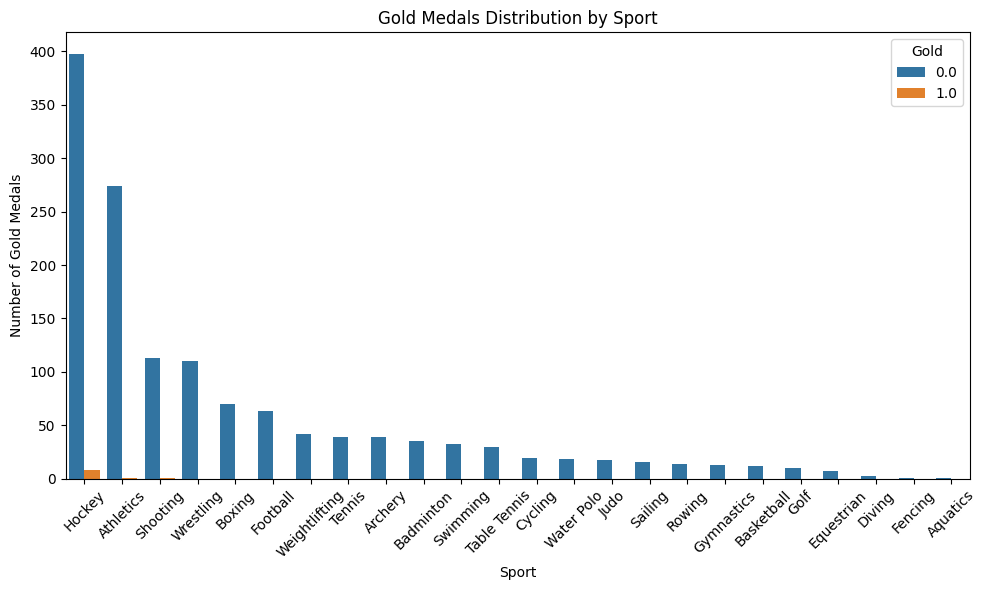

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='sport', hue='gold', order=df1['sport'].value_counts().index)
plt.title('Gold Medals Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Gold Medals')
plt.legend(title='Gold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\saivi\AppData\Local\Temp\ipykernel_9164\3755552033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='TotalMedals', data=medal_by_gender, palette='Set2')


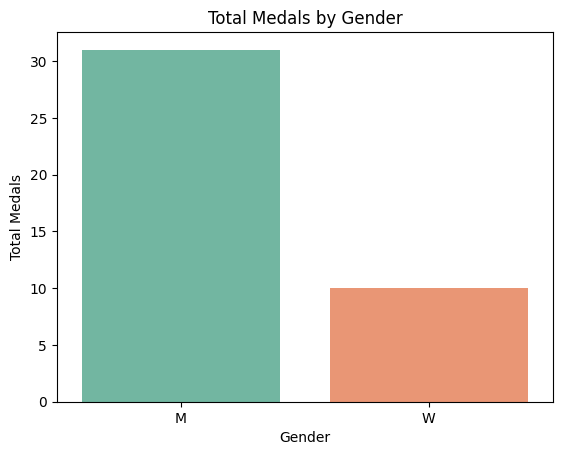

In [28]:
df1['TotalMedals'] = df1[['gold','silver','bronze']].sum(axis=1)
medal_by_gender = df1.groupby('gender')['TotalMedals'].sum().reset_index()
sns.barplot(x='gender', y='TotalMedals', data=medal_by_gender, palette='Set2')
plt.title('Total Medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Medals')
plt.show()


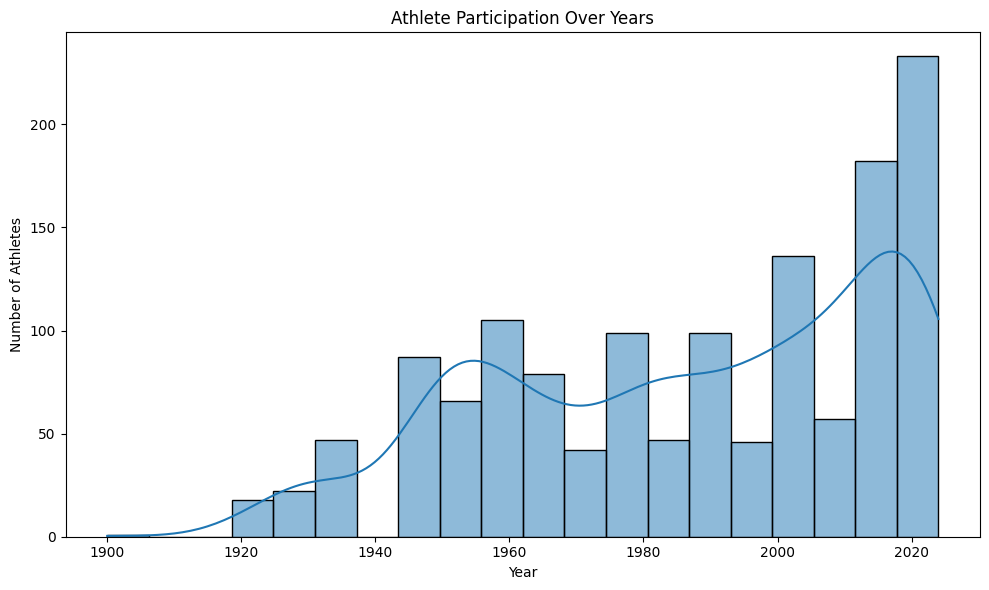

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='year', bins=20, kde=True)
plt.title('Athlete Participation Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.tight_layout()
plt.show()


C:\Users\saivi\AppData\Local\Temp\ipykernel_9164\3526122385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='name', x='Total', data=top_athletes, palette='viridis')


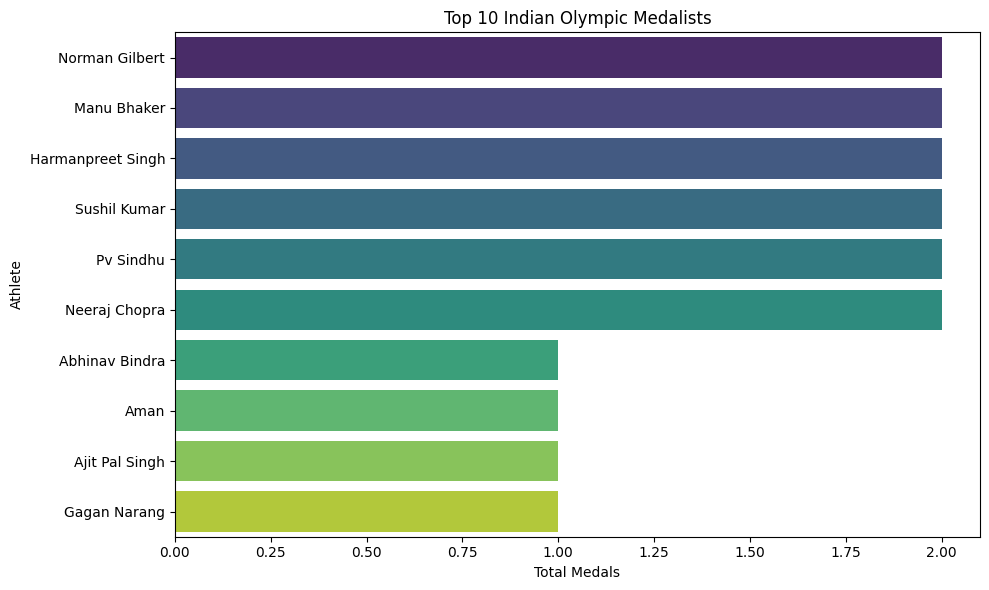

In [30]:
top_athletes = df2.sort_values('Total', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y='name', x='Total', data=top_athletes, palette='viridis')
plt.title('Top 10 Indian Olympic Medalists')
plt.xlabel('Total Medals')
plt.ylabel('Athlete')
plt.tight_layout()
plt.show()


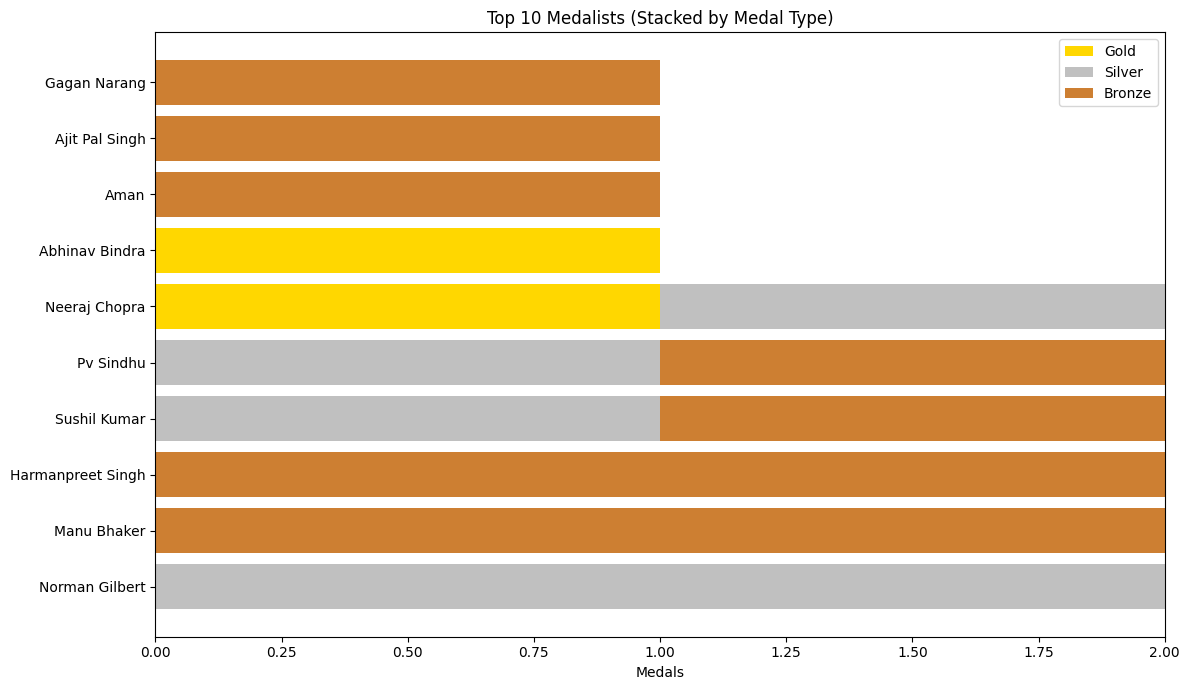

In [31]:
top_athletes = df2.sort_values('Total', ascending=False).head(10)
plt.figure(figsize=(12, 7))
bar1 = plt.barh(top_athletes['name'], top_athletes['Gold'], color='gold')
bar2 = plt.barh(top_athletes['name'], top_athletes['Silver'], left=top_athletes['Gold'], color='silver')
bar3 = plt.barh(top_athletes['name'], top_athletes['Bronze'], left=top_athletes['Gold']+top_athletes['Silver'], color='#cd7f32')
plt.xlabel('Medals')
plt.title('Top 10 Medalists (Stacked by Medal Type)')
plt.legend([bar1, bar2, bar3], ['Gold', 'Silver', 'Bronze'])
plt.tight_layout()
plt.show()


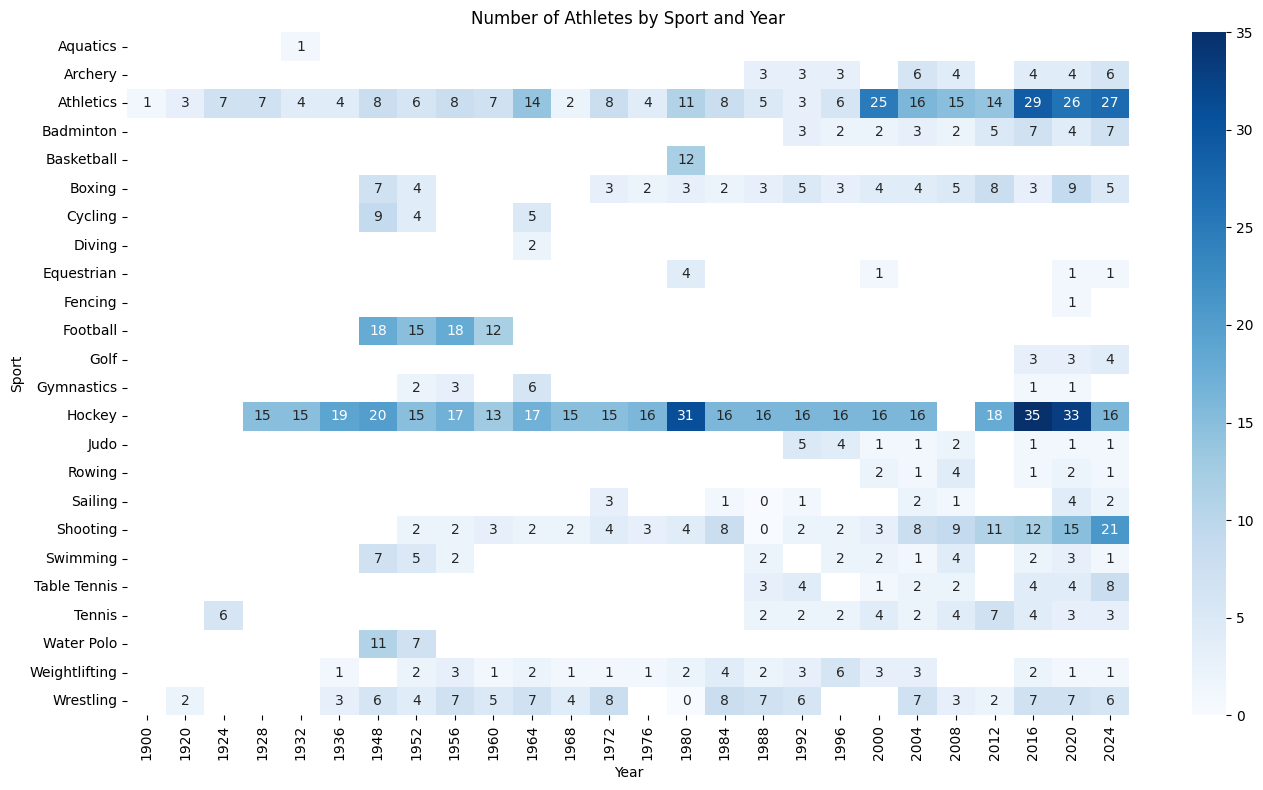

In [32]:
pivot = df3.pivot(index='sport', columns='year', values='Athletes')
plt.figure(figsize=(14,8))
sns.heatmap(pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Number of Athletes by Sport and Year')
plt.xlabel('Year')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()


c:\Users\saivi\OneDrive\Desktop\Olympics\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\saivi\OneDrive\Desktop\Olympics\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\saivi\OneDrive\Desktop\Olympics\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\saivi\OneDrive\Desktop\Olympics\.venv\Lib\site-packages\seaborn\axisgr

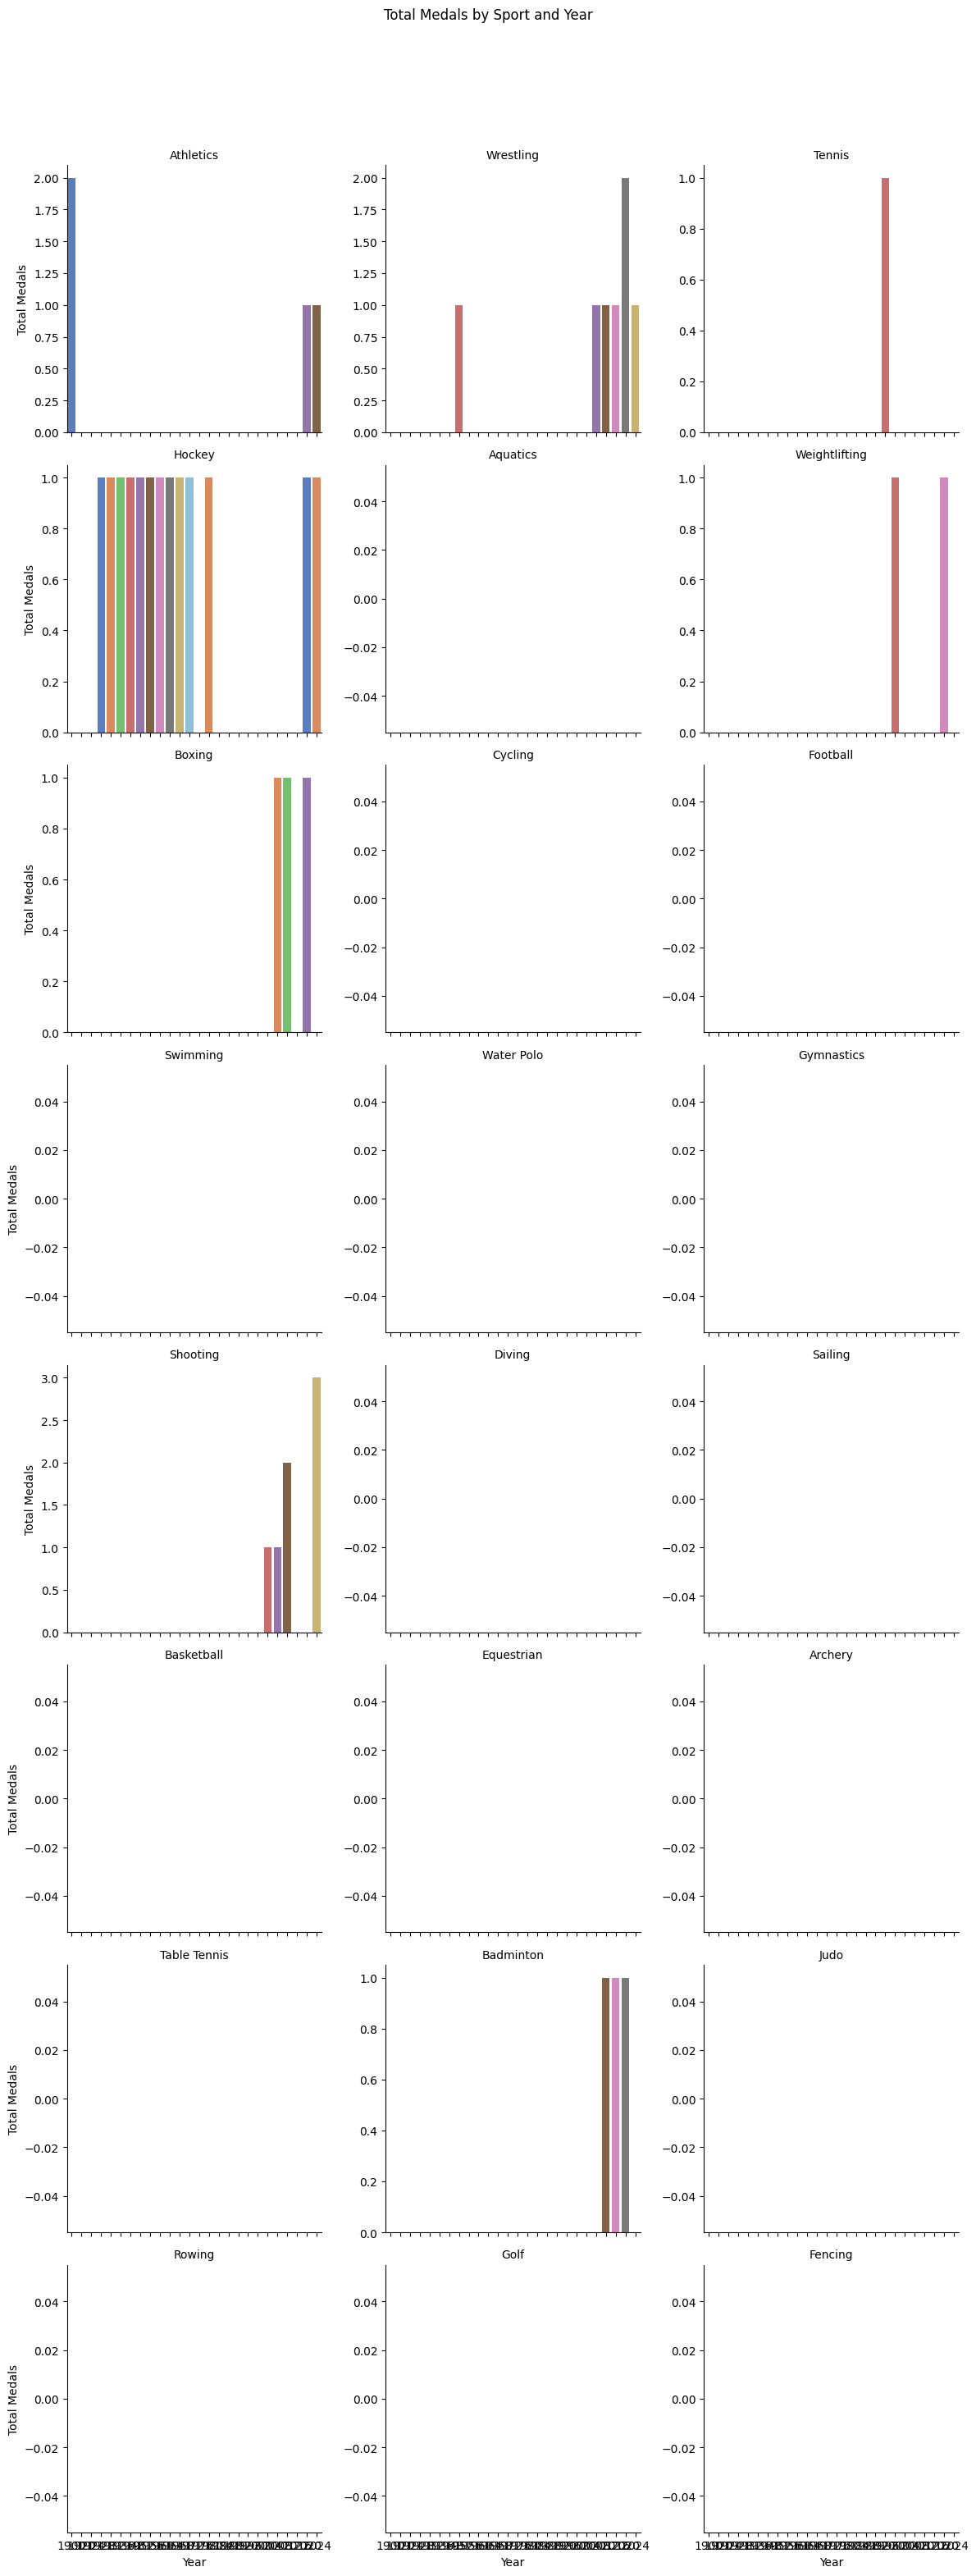

In [34]:
g = sns.FacetGrid(df3, col="sport", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='year', y='TotalMedals', palette="muted")
g.set_axis_labels("Year", "Total Medals")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Total Medals by Sport and Year')
plt.show()


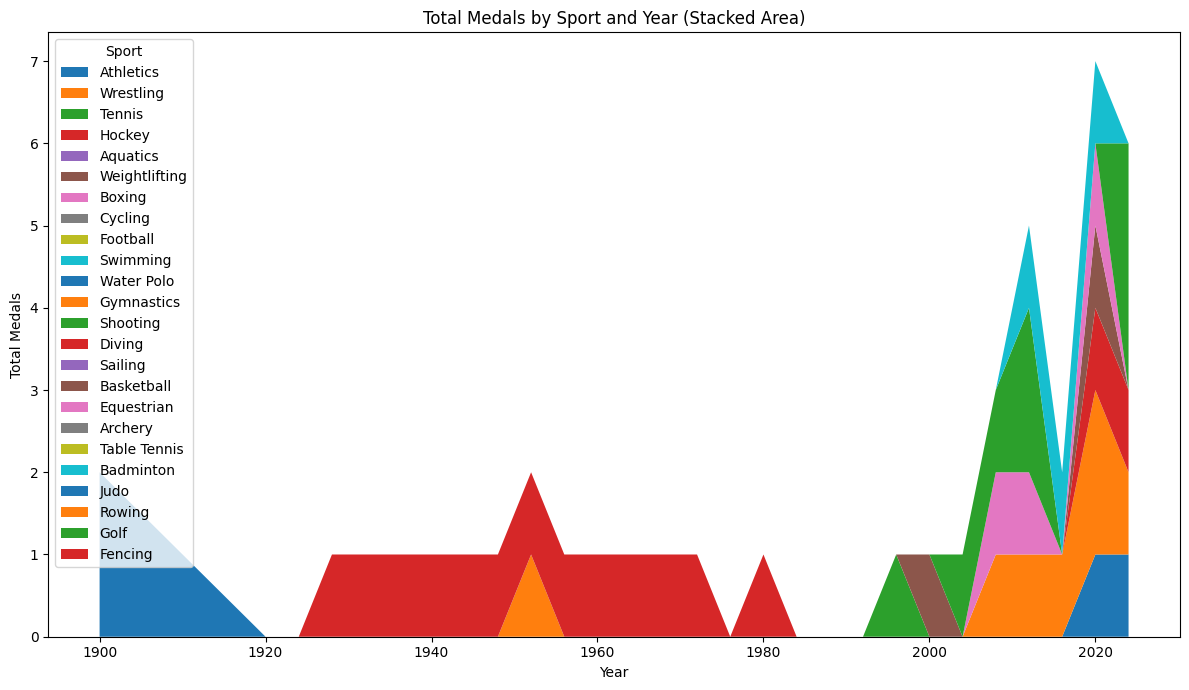

In [35]:
sports = df3['sport'].unique()
years = sorted(df3['year'].unique())
cumulative = []
for sport in sports:
    data = []
    for year in years:
        val = df3[(df3['year']==year)&(df3['sport']==sport)]['TotalMedals']
        data.append(val.values[0] if len(val) > 0 else 0)
    cumulative.append(data)

plt.figure(figsize=(12,7))
plt.stackplot(years, cumulative, labels=sports)
plt.title('Total Medals by Sport and Year (Stacked Area)')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend(title='Sport', loc='upper left')
plt.tight_layout()
plt.show()


gender
M    1085
W     299
Name: count, dtype: int64


C:\Users\saivi\AppData\Local\Temp\ipykernel_9164\2018139281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='gender', palette='Set2')


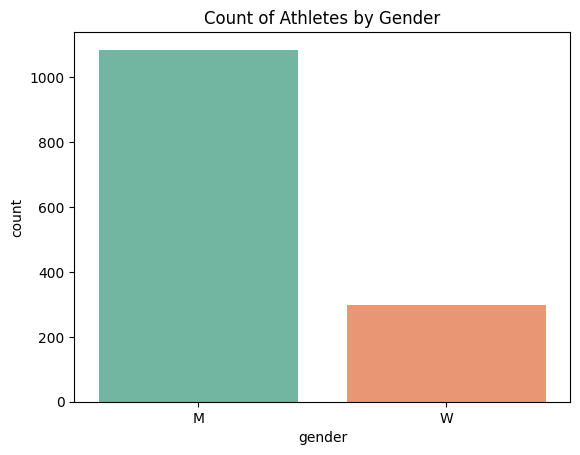

In [36]:
# 1. Count of athletes by gender (df1)
count_gender = df1['gender'].value_counts()
print(count_gender)
sns.countplot(data=df1, x='gender', palette='Set2')
plt.title('Count of Athletes by Gender')
plt.show()

sport
Hockey           406
Athletics        275
Shooting         114
Wrestling        110
Boxing            70
Football          63
Weightlifting     42
Tennis            39
Archery           39
Badminton         35
Swimming          32
Table Tennis      30
Cycling           19
Water Polo        18
Judo              17
Sailing           16
Rowing            14
Gymnastics        13
Basketball        12
Golf              10
Equestrian         7
Diving             2
Fencing            1
Aquatics           1
Name: count, dtype: int64


C:\Users\saivi\AppData\Local\Temp\ipykernel_9164\1542594013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=count_sport.index, x=count_sport.values, palette='viridis')


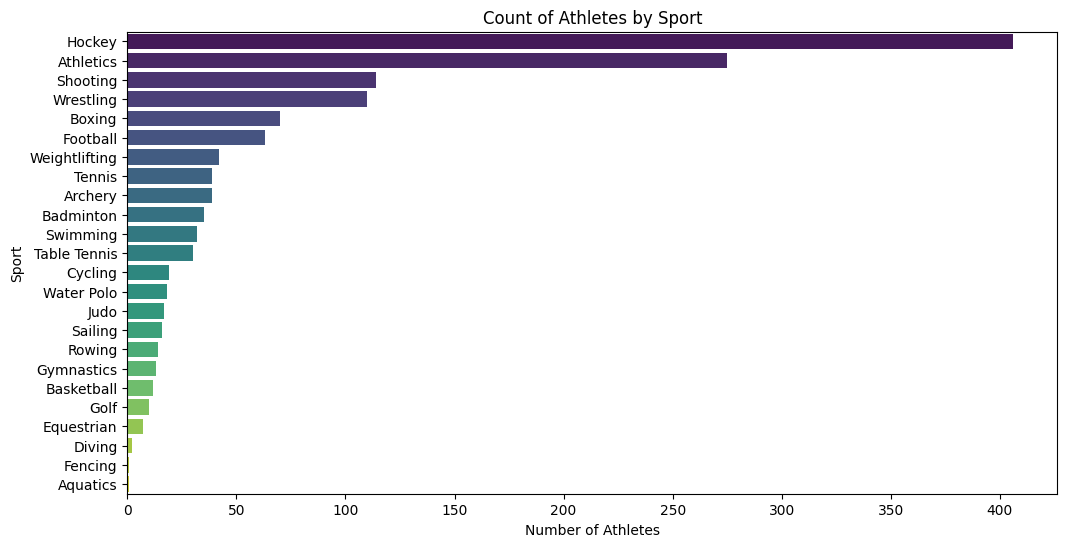

In [37]:
# 2. Count of athletes by sport (df1)
count_sport = df1['sport'].value_counts()
print(count_sport)
plt.figure(figsize=(12,6))
sns.barplot(y=count_sport.index, x=count_sport.values, palette='viridis')
plt.title('Count of Athletes by Sport')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.show()

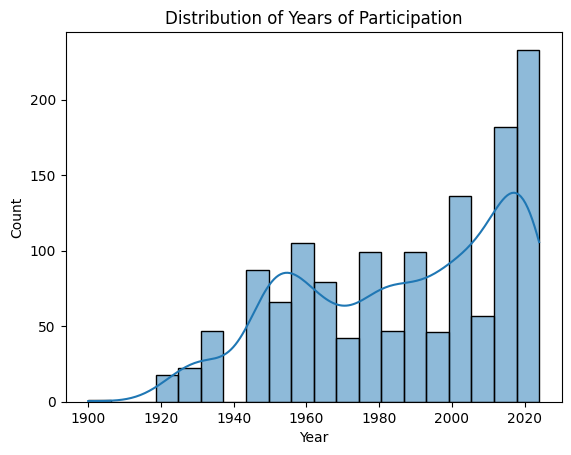

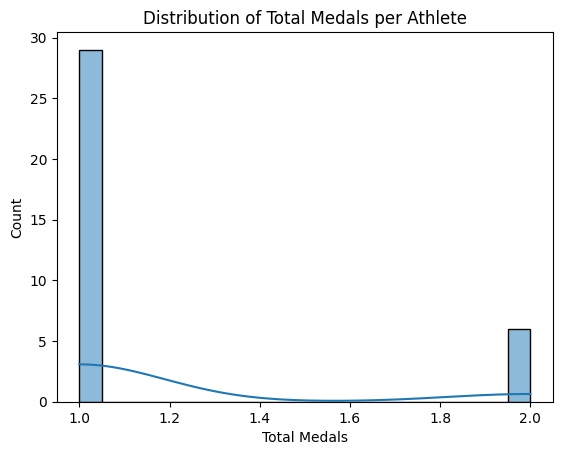

In [40]:
# 8. Distribution of total medals per athlete (df2)
sns.histplot(df2['Total'], bins=20, kde=True)
plt.title('Distribution of Total Medals per Athlete')
plt.xlabel('Total Medals')
plt.show()

In [42]:
# 11. Athletes with most participation (repeat participants) (df1)
participation_counts = df1['name'].value_counts()
top_participants = participation_counts[participation_counts > 1]
print("Athletes with Most Participation:")
print(top_participants.head(10))

Athletes with Most Participation:
name
Leander Paes       7
Abhinav Bindra     6
Leslie Claudius    5
Randhir Singh      5
Mahesh Bhupathi    5
Karni Singh        5
Sushil Kumar       4
Manpreet Singh     4
Gagan Narang       4
Vikas Gowda        4
Name: count, dtype: int64


gender   M   W
year          
1900.0   1   0
1920.0   5   0
1924.0  12   1
1928.0  22   0
1932.0  20   0
1936.0  27   0
1948.0  87   0
1952.0  62   4
1956.0  60   1
1960.0  44   0
1964.0  53   1
1968.0  24   0
1972.0  41   1
1976.0  26   0
1980.0  55  18
1984.0  41   6
1988.0  39   7
1992.0  47   6
1996.0  38   8
2000.0  44  20
2004.0  48  24
2008.0  33  24
2012.0  49  16
2016.0  60  57
2020.0  69  54
2024.0  66  44


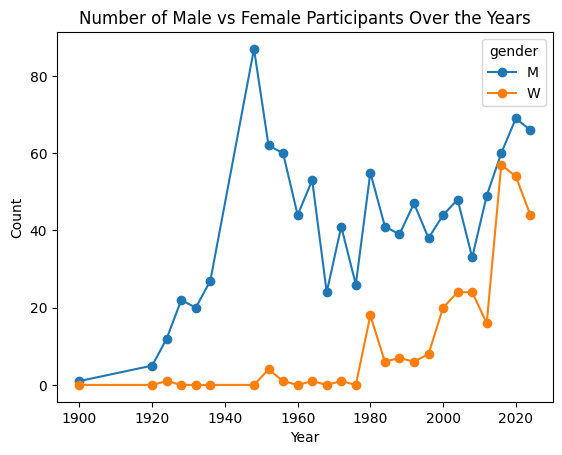

In [43]:
# 12. Frequency of male vs female participants across all years (df1)
gender_year = df1.groupby(['year', 'gender']).size().unstack(fill_value=0)
print(gender_year)
gender_year.plot(kind='line', marker='o')
plt.title('Number of Male vs Female Participants Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Skewness for Gold Medals: 11.653383905265091
Skewness for Silver Medals: 14.236089874977647
Skewness for Bronze Medals: 8.954632768027986


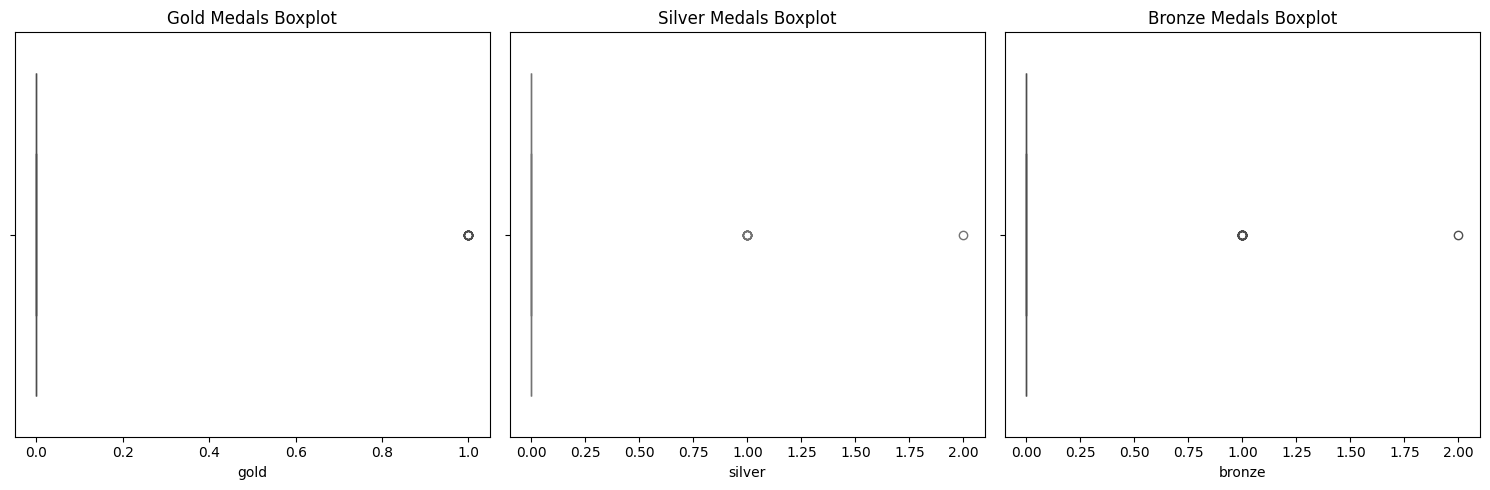

In [44]:
# 15. Skewness and outliers in medal counts (df1)
print("Skewness for Gold Medals:", df1['gold'].skew())
print("Skewness for Silver Medals:", df1['silver'].skew())
print("Skewness for Bronze Medals:", df1['bronze'].skew())

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df1['gold'], color='gold')
plt.title('Gold Medals Boxplot')
plt.subplot(1,3,2)
sns.boxplot(x=df1['silver'], color='silver')
plt.title('Silver Medals Boxplot')
plt.subplot(1,3,3)
sns.boxplot(x=df1['bronze'], color='#cd7f32')
plt.title('Bronze Medals Boxplot')
plt.tight_layout()

C:\Users\saivi\AppData\Local\Temp\ipykernel_9164\693636736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_medals', y='sport', data=medals_sport, palette='viridis')


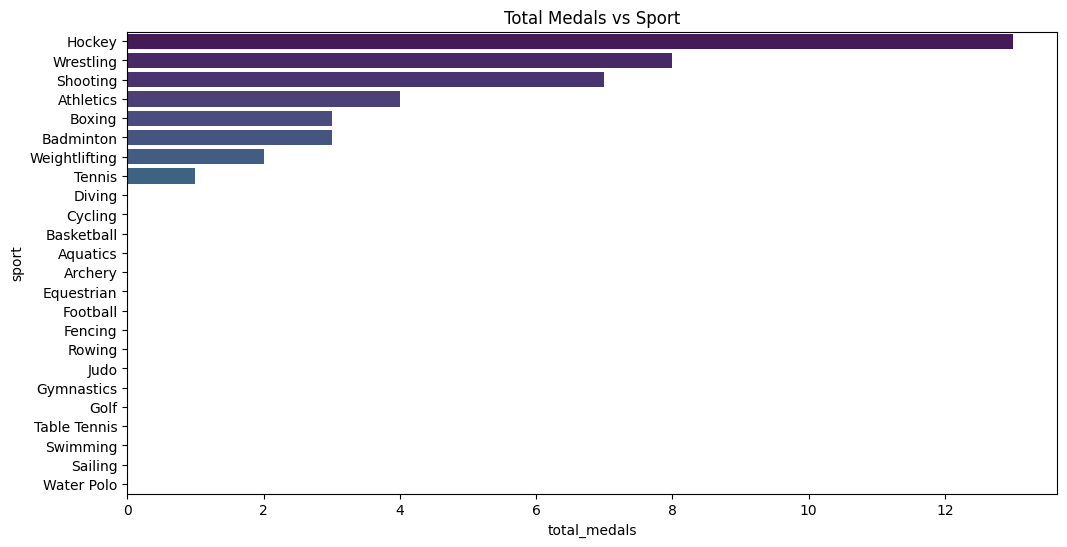

In [47]:
# 2. Total medals vs sport (df1)
medals_sport = df1.groupby('sport')['total_medals'].sum().reset_index().sort_values(by='total_medals', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='total_medals', y='sport', data=medals_sport, palette='viridis')
plt.title('Total Medals vs Sport')
plt.show()

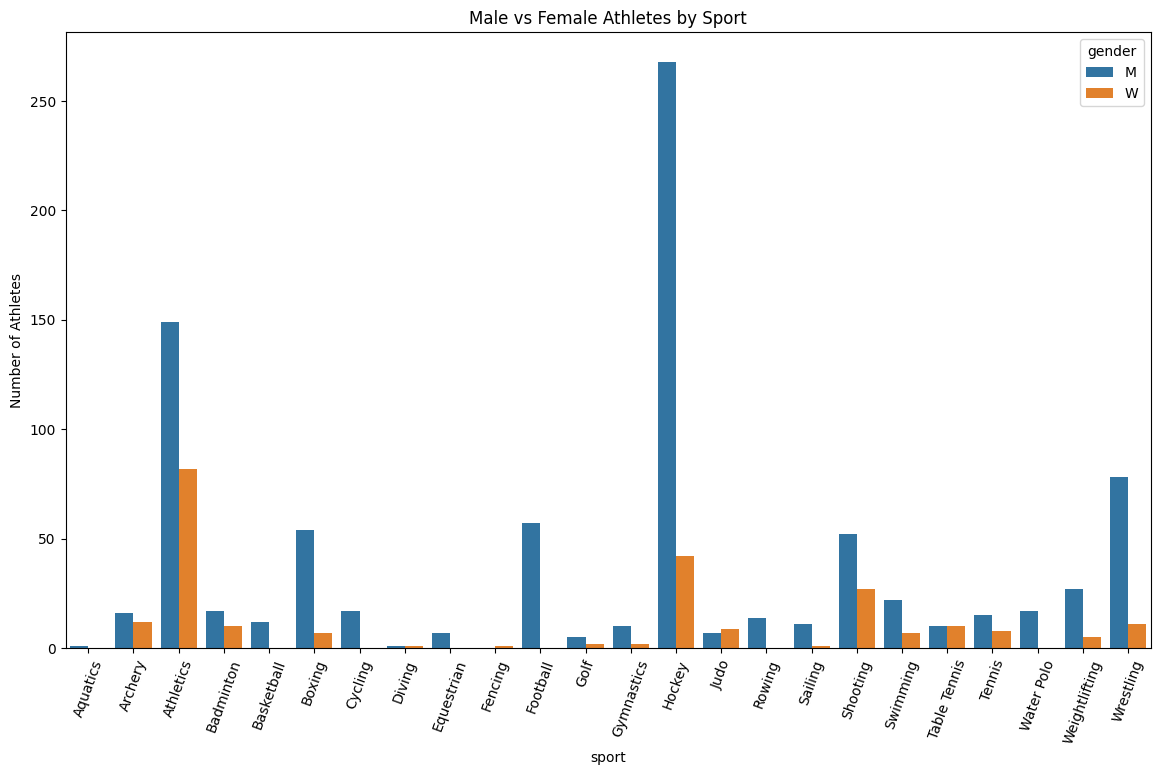

In [48]:
# 3. Male vs female athletes in each sport (df1)
athletes_sport_gender = df1.groupby(['sport', 'gender'])['name'].nunique().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=athletes_sport_gender, x='sport', y='name', hue='gender')
plt.title('Male vs Female Athletes by Sport')
plt.xticks(rotation=70)
plt.ylabel('Number of Athletes')
plt.show()

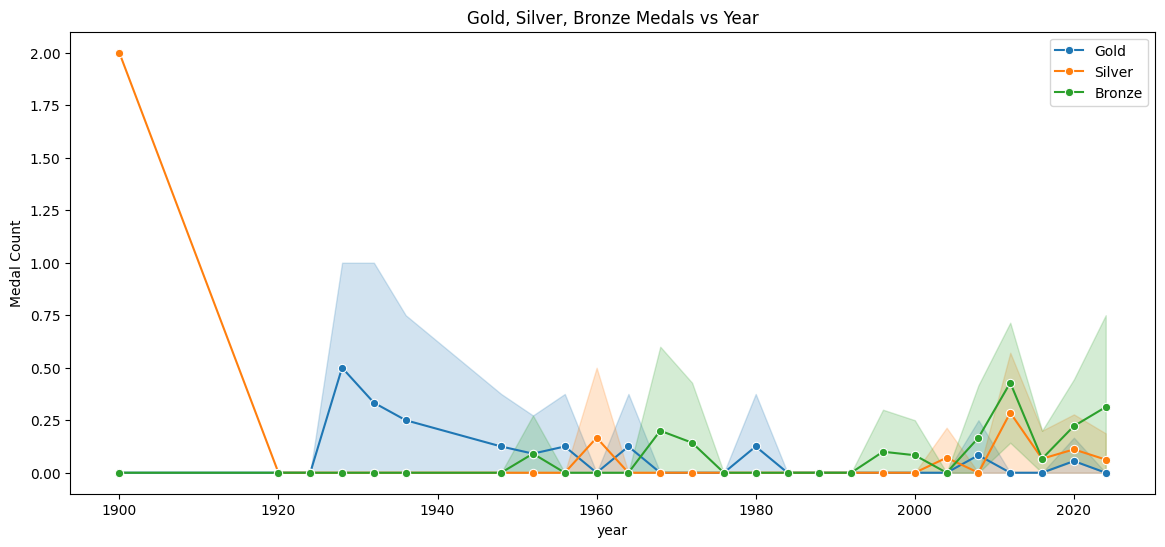

In [49]:
# 4-6. Gold, Silver, Bronze medals vs year (df3)
plt.figure(figsize=(14,6))
sns.lineplot(data=df3, x='year', y='Gold', marker='o', label='Gold')
sns.lineplot(data=df3, x='year', y='Silver', marker='o', label='Silver')
sns.lineplot(data=df3, x='year', y='Bronze', marker='o', label='Bronze')
plt.title('Gold, Silver, Bronze Medals vs Year')
plt.ylabel('Medal Count')
plt.legend()
plt.show()

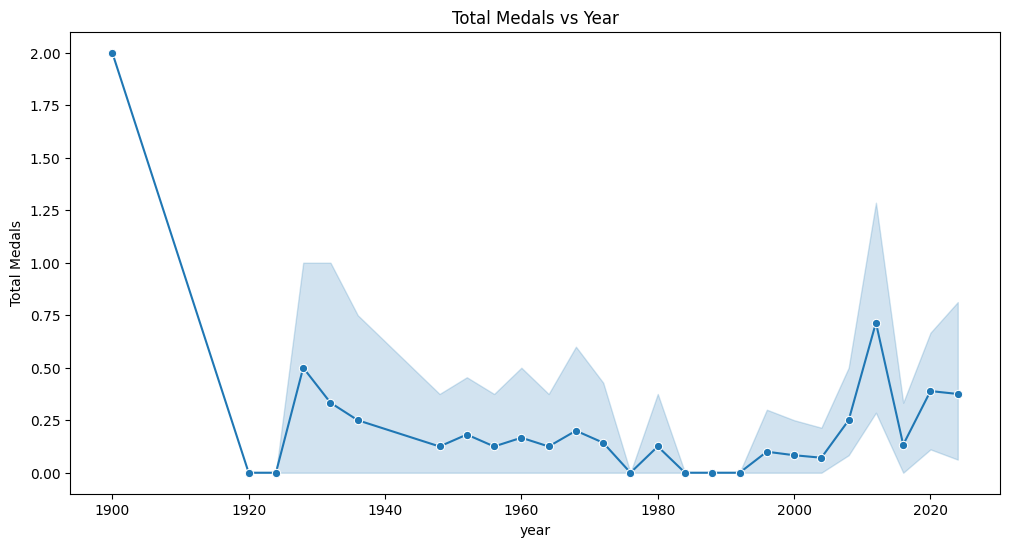

In [50]:
# 7. Total medals vs year (df3)
df3['TotalMedals'] = df3['Gold'] + df3['Silver'] + df3['Bronze']
plt.figure(figsize=(12,6))
sns.lineplot(data=df3, x='year', y='TotalMedals', marker='o')
plt.title('Total Medals vs Year')
plt.ylabel('Total Medals')
plt.show()

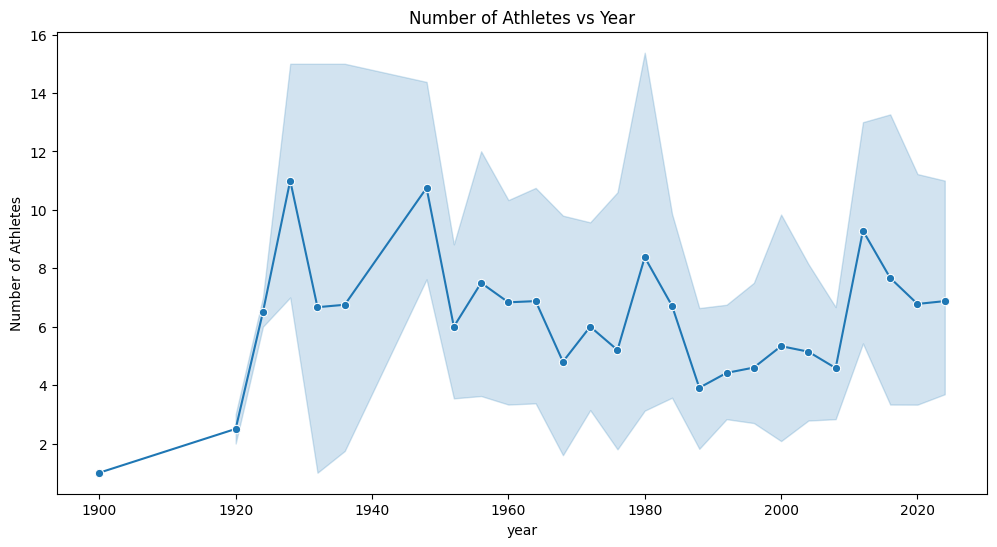

In [51]:
# 8. Number of athletes vs year (df3)
plt.figure(figsize=(12,6))
sns.lineplot(data=df3, x='year', y='Athletes', marker='o')
plt.title('Number of Athletes vs Year')
plt.ylabel('Number of Athletes')
plt.show()

C:\Users\saivi\AppData\Local\Temp\ipykernel_9164\3137853161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_medals', y='sport', data=top5_sports, palette='coolwarm')


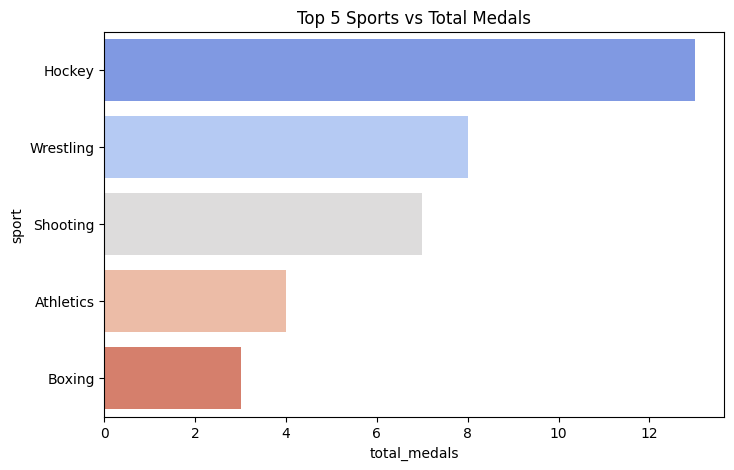

In [52]:
# 10. Top 5 sports vs total medals (df1)
top5_sports = medals_sport.head(5)
plt.figure(figsize=(8,5))
sns.barplot(x='total_medals', y='sport', data=top5_sports, palette='coolwarm')
plt.title('Top 5 Sports vs Total Medals')
plt.show()

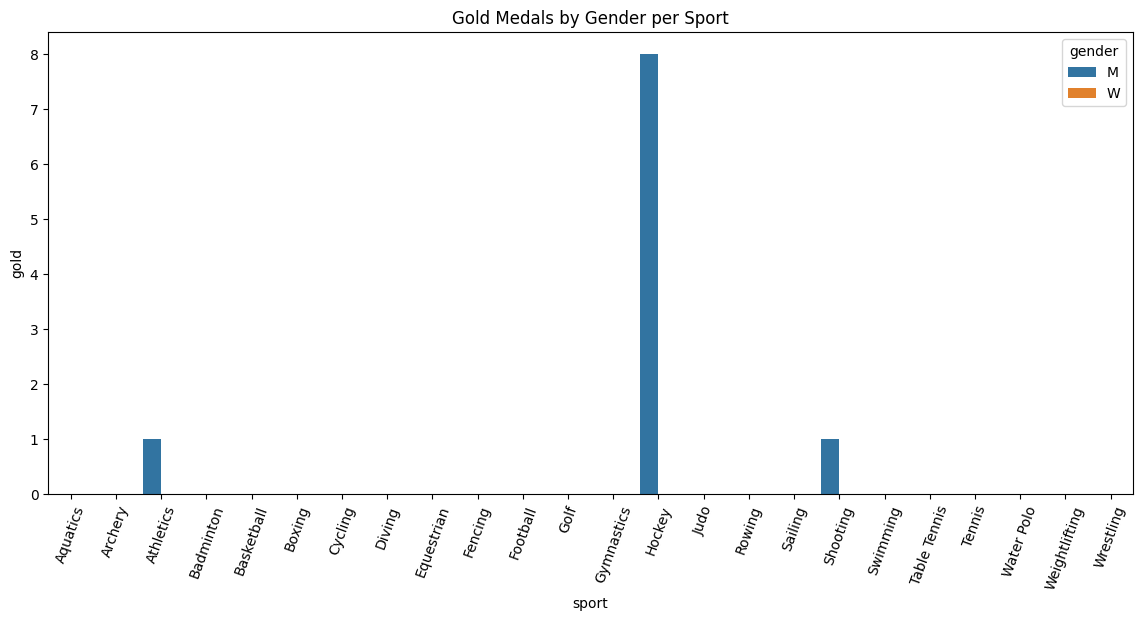

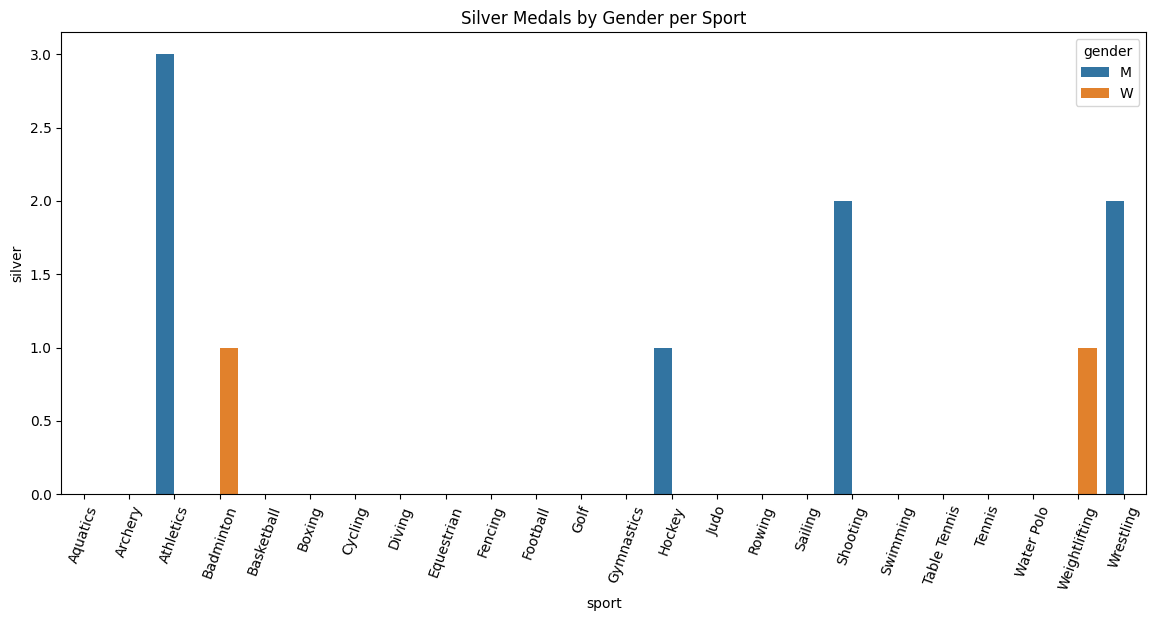

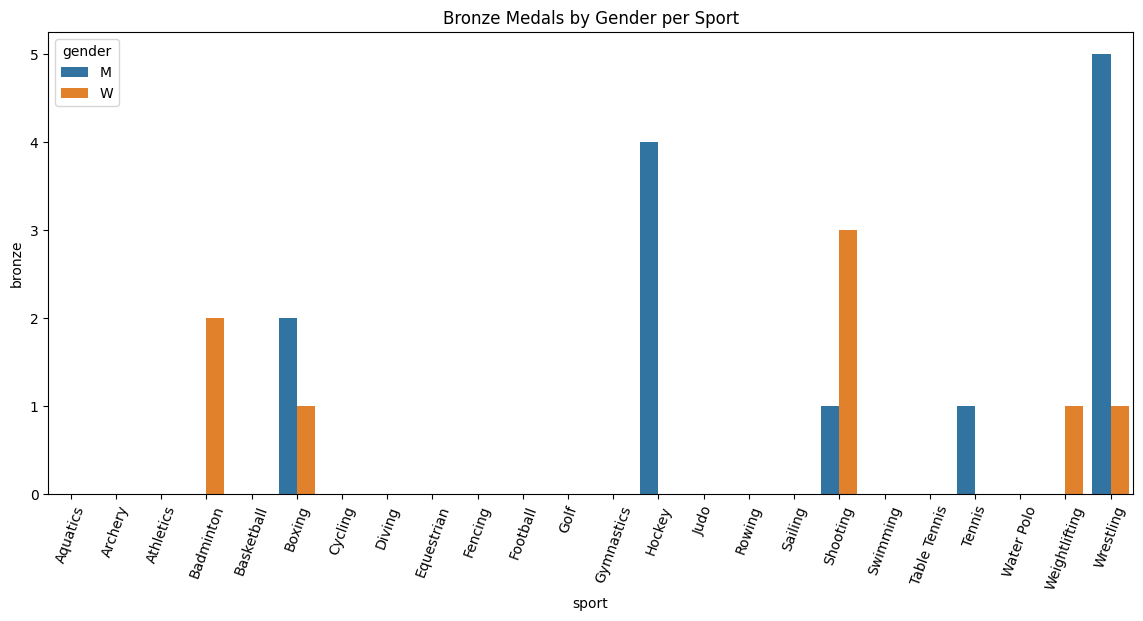

In [53]:
# 11-13. Gender vs gold, silver, bronze medals per sport (df1)
for medal_type in ['gold', 'silver', 'bronze']:
    plt.figure(figsize=(14,6))
    medal_gender_sport = df1.groupby(['sport', 'gender'])[medal_type].sum().reset_index()
    sns.barplot(data=medal_gender_sport, x='sport', y=medal_type, hue='gender')
    plt.title(f'{medal_type.title()} Medals by Gender per Sport')
    plt.xticks(rotation=70)
    plt.show()

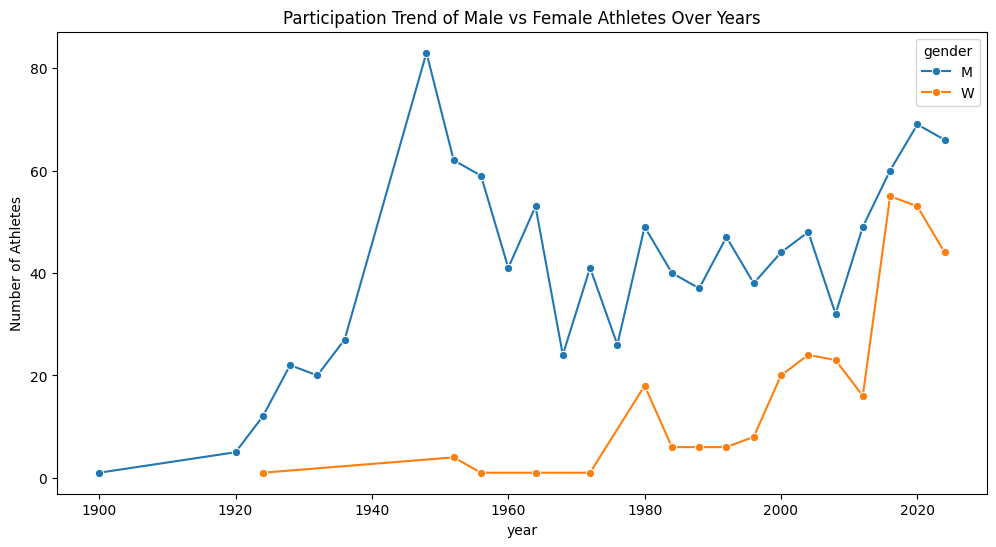

In [55]:
# 16. Participation trend of male vs female athletes over years (df1)
gender_year_count = df1.groupby(['year', 'gender'])['name'].nunique().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=gender_year_count, x='year', y='name', hue='gender', marker='o')
plt.title('Participation Trend of Male vs Female Athletes Over Years')
plt.ylabel('Number of Athletes')
plt.show()


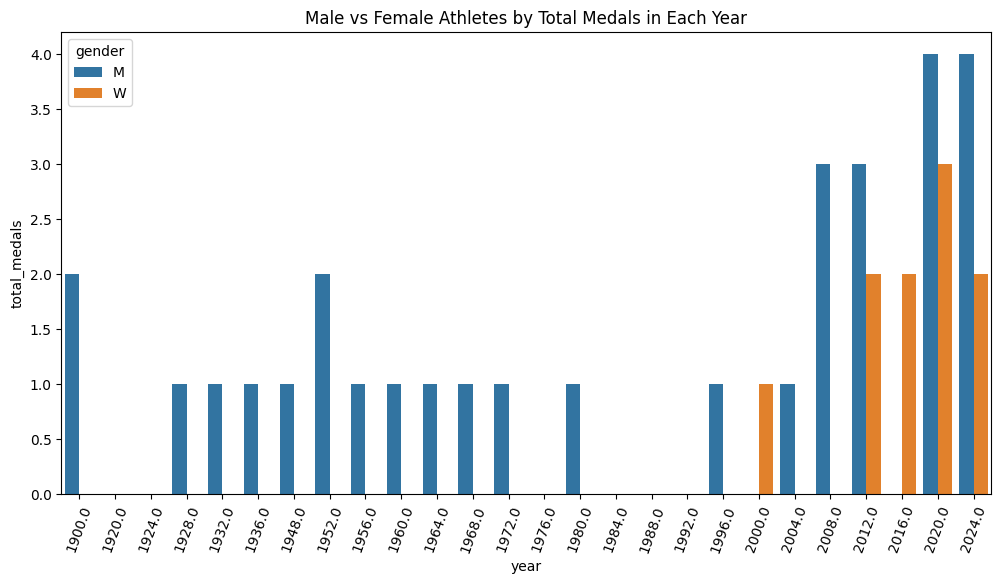

In [57]:
# 19. Male vs female athletes by total medals in each year (df1)
medals_year_gender = df1.groupby(['year', 'gender'])['total_medals'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=medals_year_gender, x='year', y='total_medals', hue='gender')
plt.title('Male vs Female Athletes by Total Medals in Each Year')
plt.xticks(rotation=70)
plt.show()

Multi

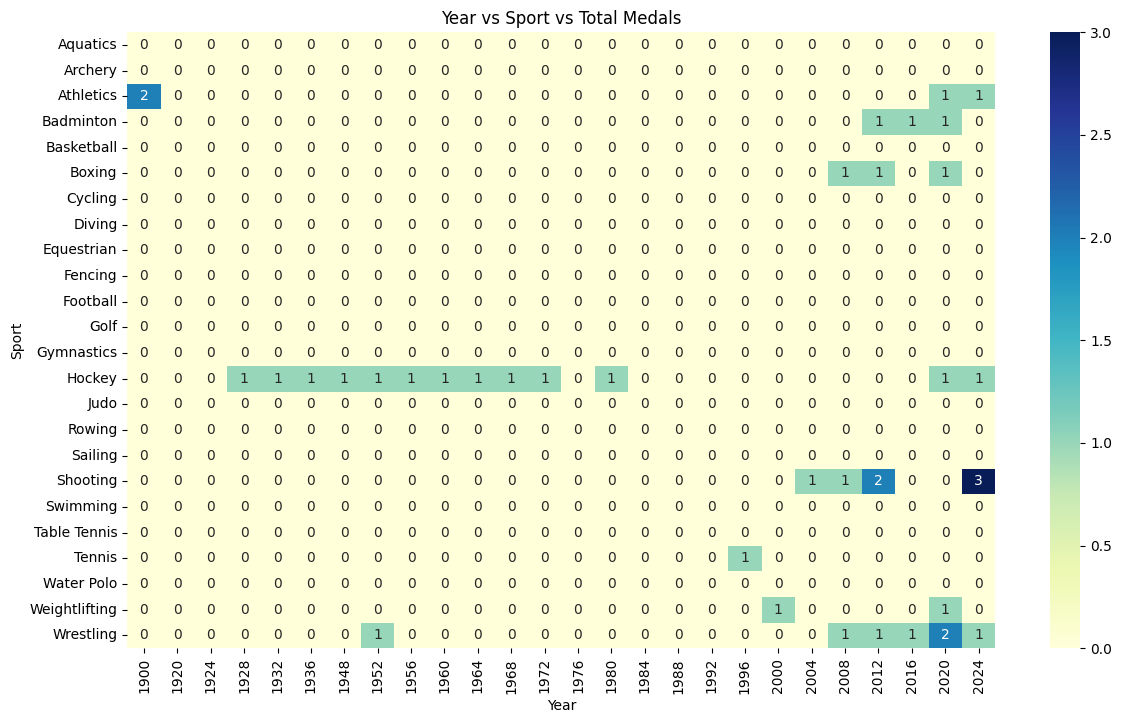

In [58]:
# 1. Year vs Sport vs Total Medals (Heatmap)
pivot_year_sport = df3.pivot(index='sport', columns='year', values='TotalMedals').fillna(0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot_year_sport, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Year vs Sport vs Total Medals')
plt.xlabel('Year')
plt.ylabel('Sport')
plt.show()

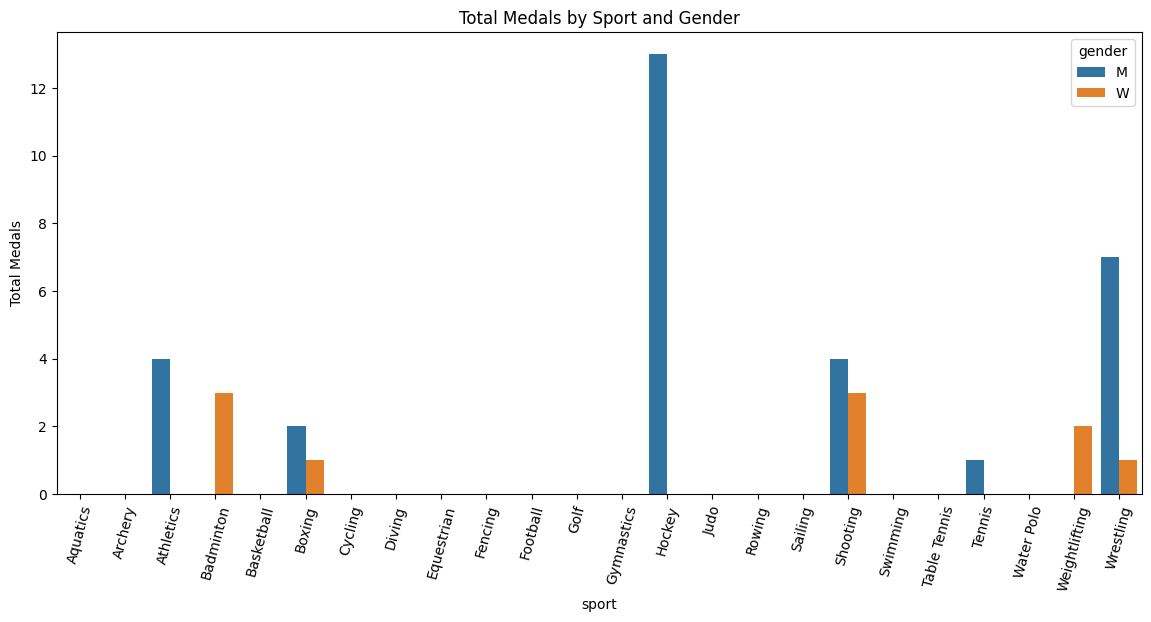

In [60]:
# 3. Sport vs Gender vs Total Medals (Barplot with Hue)
medals_sport_gender = df1.groupby(['sport', 'gender'])['total_medals'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(data=medals_sport_gender, x='sport', y='total_medals', hue='gender')
plt.title('Total Medals by Sport and Gender')
plt.xticks(rotation=75)
plt.ylabel('Total Medals')
plt.show()

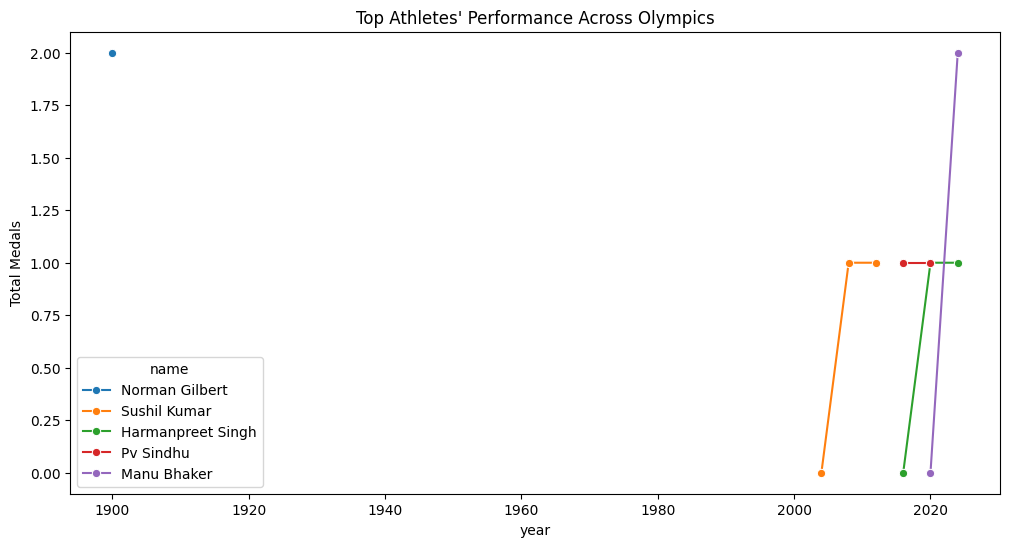

In [61]:
# 5. Top Athletes’ Performance Across Multiple Olympics (Lineplot)
top_athletes = df2.sort_values('Total', ascending=False).head(5)['name'].tolist()
df_top_athletes = df1[df1['name'].isin(top_athletes)].groupby(['year','name'])['total_medals'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_top_athletes, x='year', y='total_medals', hue='name', marker='o')
plt.title("Top Athletes' Performance Across Olympics")
plt.ylabel('Total Medals')
plt.show()

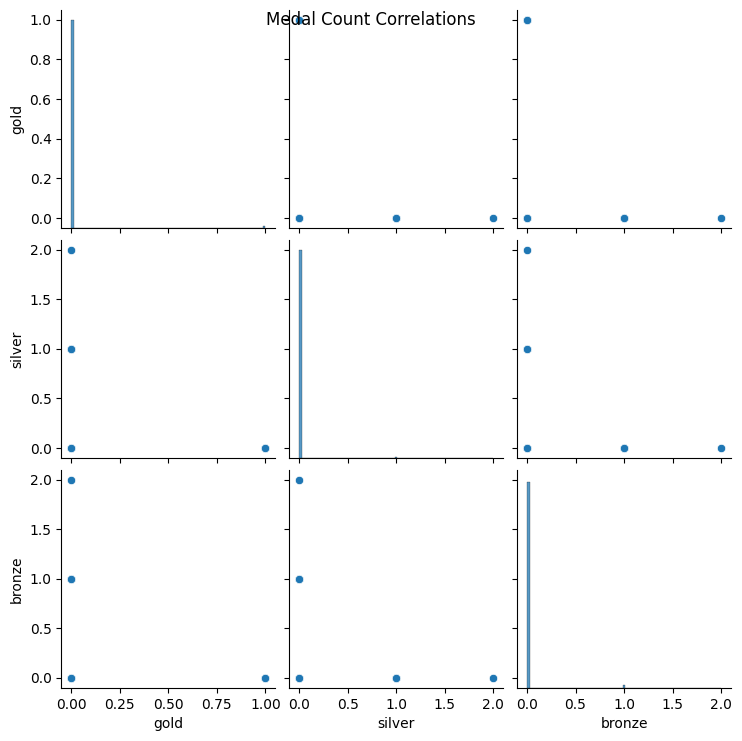

In [63]:
# 11. Medal Count Correlation Among Gold, Silver, Bronze
medal_counts = df1[['gold', 'silver', 'bronze']]
sns.pairplot(medal_counts)
plt.suptitle('Medal Count Correlations')
plt.show()


In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Assuming df1, df3 are loaded and preprocessed, total_medals computed in df1:
df1['total_medals'] = df1['gold'] + df1['silver'] + df1['bronze']

# Get sorted unique sports list
sports_list = sorted(df1['sport'].dropna().unique())

def show_sport_analysis(selected_sport):
    print(f"Analysis for sport: {selected_sport}\n")
    
    # Filter df1 and df3 for selected sport
    df_sport = df1[df1['sport'] == selected_sport]
    df3_sport = df3[df3['sport'] == selected_sport]

    # 1. Participants over years (total)
    participants_per_year = df_sport.groupby('year')['name'].nunique().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=participants_per_year, x='year', y='name', marker='o')
    plt.title(f'Total Participants in {selected_sport} Over Years')
    plt.ylabel('Number of Participants')
    plt.xlabel('Year')
    plt.show()

    # 2. Male vs Female Participation over years
    gender_participation = df_sport.groupby(['year', 'gender'])['name'].nunique().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=gender_participation, x='year', y='name', hue='gender', marker='o')
    plt.title(f'Male vs Female Participation in {selected_sport} Over Years')
    plt.ylabel('Number of Participants')
    plt.xlabel('Year')
    plt.show()

    # 3. Total medals by year
    medals_year = df3_sport[['year', 'Gold', 'Silver', 'Bronze']].set_index('year')
    medals_year['Total'] = medals_year.sum(axis=1)
    medals_year.plot(kind='bar', stacked=True, figsize=(12,5), colormap='Paired')
    plt.title(f'Total Medals in {selected_sport} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Medal Count')
    plt.show()

    # 4. Most successful Olympics (year with max medals)
    max_medals_year = medals_year['Total'].idxmax()
    max_medals = medals_year.loc[max_medals_year, 'Total']
    print(f"Most Successful Olympics in {selected_sport}: Year {max_medals_year} with {max_medals} total medals.")

# Create dropdown widget
sport_dropdown = widgets.Dropdown(options=sports_list, description='Select Sport:', layout=widgets.Layout(width='50%'))
interact(show_sport_analysis, selected_sport=sport_dropdown);


interactive(children=(Dropdown(description='Select Sport:', layout=Layout(width='50%'), options=('Aquatics', '…

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Assuming df1 and df3 are loaded, cleaned, and df1 has 'total_medals' column computed

# Get sorted list of unique years
years_list = sorted(df1['year'].dropna().unique())

def show_year_analysis(selected_year):
    print(f"Analysis for Year: {selected_year}\n")
    
    # Filter df1 and df3 by selected year
    df_year = df1[df1['year'] == selected_year]
    df3_year = df3[df3['year'] == selected_year]
    
    # 1. Number of participants by sport
    participants_sport = df_year.groupby('sport')['name'].nunique().reset_index()
    plt.figure(figsize=(12,6))
    sns.barplot(data=participants_sport, x='name', y='sport', palette='viridis')
    plt.title(f'Number of Participants by Sport in {selected_year}')
    plt.xlabel('Number of Participants')
    plt.ylabel('Sport')
    plt.show()
    
    # 2. Male vs Female participants count
    gender_counts = df_year['gender'].value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
    plt.title(f'Male vs Female Participants in {selected_year}')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()
    
    # 3. Medals by sport (stacked gold, silver, bronze)
    medals_sport = df_year.groupby('sport')[['gold','silver','bronze']].sum().reset_index()
    medals_sport.set_index('sport', inplace=True)
    medals_sport.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')
    plt.title(f'Medals by Sport in {selected_year}')
    plt.xlabel('Sport')
    plt.ylabel('Number of Medals')
    plt.show()
    
    # 4. Most successful sport that year (by total medals)
    medals_sport['Total'] = medals_sport.sum(axis=1)
    most_successful_sport = medals_sport['Total'].idxmax()
    max_medals = medals_sport.loc[most_successful_sport, 'Total']
    print(f"Most successful sport in {selected_year}: {most_successful_sport} with {max_medals} total medals.")

# Create dropdown widget for years
year_dropdown = widgets.Dropdown(options=years_list, description='Select Year:', layout=widgets.Layout(width='40%'))
interact(show_year_analysis, selected_year=year_dropdown);


interactive(children=(Dropdown(description='Select Year:', layout=Layout(width='40%'), options=(np.float64(190…